In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC

In [83]:
df = pd.read_csv('nba_data.csv')
df.head()

,Name,games_played,minutes_played,points_scored,goals_scored,goals_attempted,3_point_scored,3_point_attempted,free_throws_scored,free_throws_attempted,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnover,5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,0.5,2.1,1.6,2.3,0.7,3.4,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,0.7,2.8,2.6,3.4,0.5,2.0,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,0.4,1.7,0.9,1.3,0.5,1.7,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,0.1,0.5,0.9,1.3,1.0,0.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,0.0,0.1,1.3,1.9,1.0,1.5,0.3,0.3,0.4,0.8,1


In [84]:
print("Dataset Summary")
summ = pd.DataFrame(df.describe())
summ

Dataset Summary


,games_played,minutes_played,points_scored,goals_scored,goals_attempted,3_point_scored,3_point_attempted,free_throws_scored,free_throws_attempted,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnover,5Yrs
count,1308.000000,1308.000000,1308.000000,1308.00000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,60.344801,17.605352,6.785321,2.62263,5.871865,0.249083,0.781422,1.292890,1.815291,1.008639,2.023930,1.543807,0.616820,0.369495,1.189144,0.623853
std,17.406994,8.286363,4.331749,1.67271,3.572138,0.385813,1.066431,0.980687,1.315755,0.774652,1.356342,1.468204,0.409704,0.431109,0.719977,0.484603
min,11.000000,3.100000,0.700000,0.30000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.900000,3.700000,1.40000,3.300000,0.000000,0.000000,0.600000,0.900000,0.400000,1.000000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.10000,4.800000,0.100000,0.300000,1.000000,1.500000,0.800000,1.700000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.825000,8.800000,3.40000,7.500000,0.400000,1.200000,1.600000,2.300000,1.400000,2.600000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.20000,19.800000,2.300000,6.500000,7.700000,10.200000,5.300000,9.600000,10.600000,2.500000,3.900000,4.400000,1.000000


In [85]:
print("Checking for null values")
na = pd.DataFrame(df.isna().sum())
print(na)

Checking for null values
                       0
Name                   0
games_played           0
minutes_played         0
points_scored          0
goals_scored           0
goals_attempted        0
3_point_scored         0
3_point_attempted      0
free_throws_scored     0
free_throws_attempted  0
offensive_rebounds     0
defensive_rebounds     0
assists                0
steals                 0
blocks                 0
turnover               0
5Yrs                   0


As shown above there are no null values

In [86]:
nba_corr_matrix = df.corr()
nba_corr_matrix

,games_played,minutes_played,points_scored,goals_scored,goals_attempted,3_point_scored,3_point_attempted,free_throws_scored,free_throws_attempted,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnover,5Yrs
games_played,1.000000,0.590497,0.538867,0.543280,0.518928,0.114253,0.106481,0.479895,0.477149,0.400124,0.462810,0.369971,0.450246,0.277622,0.516845,0.405857
minutes_played,0.590497,1.000000,0.910975,0.901778,0.909576,0.394750,0.409128,0.789901,0.778851,0.569346,0.742275,0.631076,0.755572,0.396830,0.825932,0.323363
points_scored,0.538867,0.910975,1.000000,0.990741,0.979965,0.351191,0.361747,0.895462,0.880669,0.568964,0.688683,0.555049,0.674041,0.384324,0.850852,0.320262
goals_scored,0.543280,0.901778,0.990741,1.000000,0.979926,0.292868,0.303208,0.846974,0.840542,0.591664,0.698546,0.534309,0.661021,0.396457,0.835020,0.322085
goals_attempted,0.518928,0.909576,0.979965,0.979926,1.000000,0.394085,0.417649,0.826867,0.806879,0.498368,0.635724,0.593207,0.689400,0.319834,0.846800,0.295804
3_point_scored,0.114253,0.394750,0.351191,0.292868,0.394085,1.000000,0.982701,0.161321,0.097951,-0.221785,0.017565,0.382450,0.309784,-0.158294,0.257942,0.034574
3_point_attempted,0.106481,0.409128,0.361747,0.303208,0.417649,0.982701,1.000000,0.177574,0.112284,-0.234133,0.013304,0.416828,0.342784,-0.171065,0.283856,0.015337
free_throws_scored,0.479895,0.789901,0.895462,0.846974,0.826867,0.161321,0.177574,1.000000,0.980481,0.577632,0.648048,0.478865,0.598422,0.403249,0.805439,0.301543
free_throws_attempted,0.477149,0.778851,0.880669,0.840542,0.806879,0.097951,0.112284,0.980481,1.000000,0.648289,0.695948,0.431839,0.578688,0.464610,0.800134,0.301935
offensive_rebounds,0.400124,0.569346,0.568964,0.591664,0.498368,-0.221785,-0.234133,0.577632,0.648289,1.000000,0.835962,-0.013606,0.285598,0.647799,0.420400,0.297874


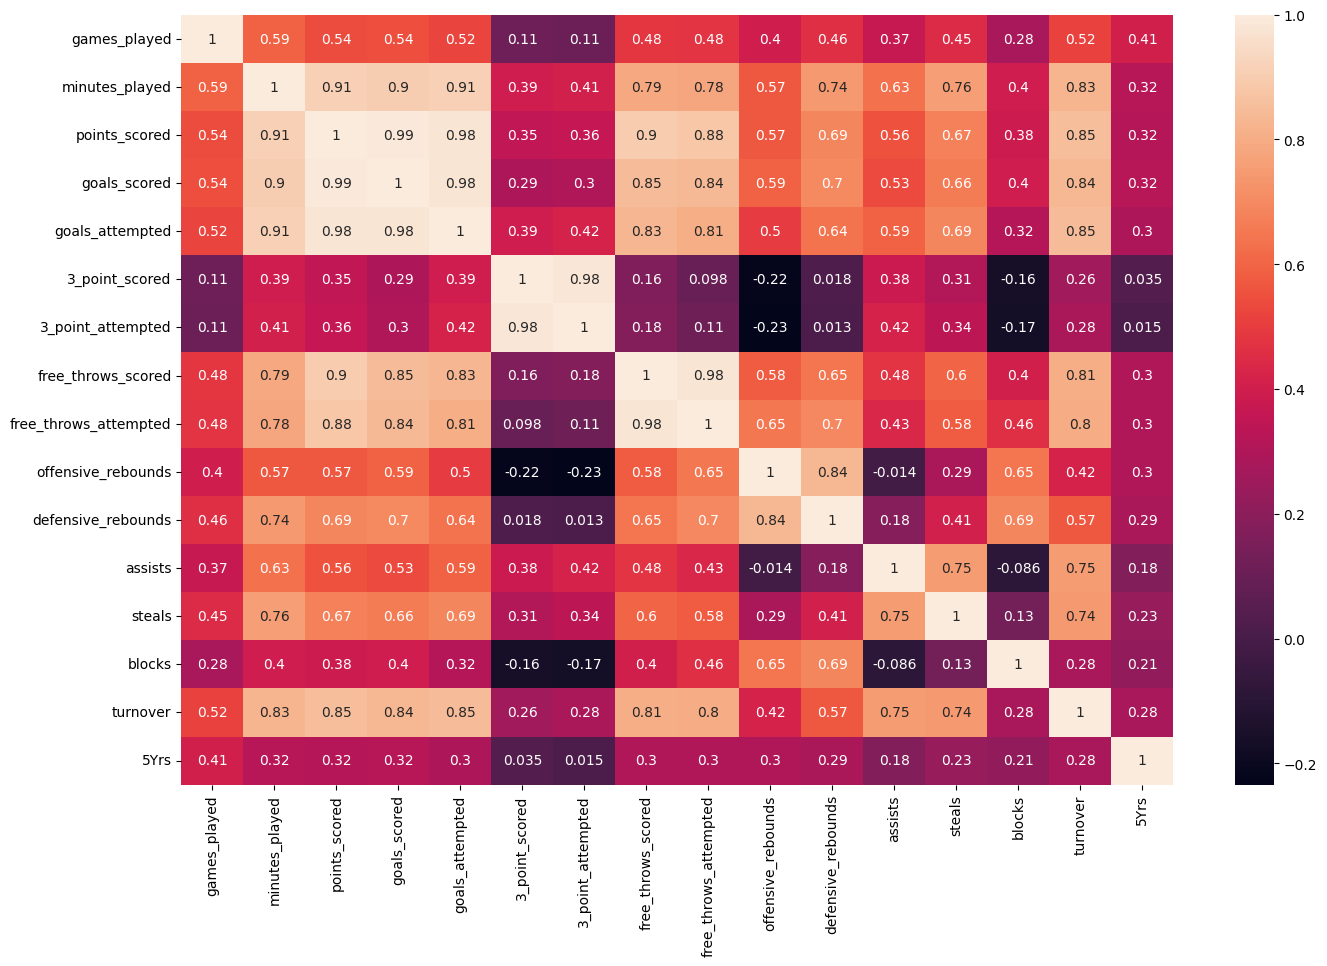

In [87]:
plt.figure(figsize=(16, 10))
sns.heatmap(nba_corr_matrix, annot=True, cmap='rocket')
plt.show()

As seen from the above correlation heatmap, there is no use for the column name. So we can drop it

In [88]:
df = df.drop(['Name'], axis = 1)
df['success'] = df['5Yrs']
df = df.drop(['5Yrs'], axis = 1)
df.head()

,games_played,minutes_played,points_scored,goals_scored,goals_attempted,3_point_scored,3_point_attempted,free_throws_scored,free_throws_attempted,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnover,success
0,36,27.4,7.4,2.6,7.6,0.5,2.1,1.6,2.3,0.7,3.4,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,0.7,2.8,2.6,3.4,0.5,2.0,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,0.4,1.7,0.9,1.3,0.5,1.7,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,0.1,0.5,0.9,1.3,1.0,0.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,0.0,0.1,1.3,1.9,1.0,1.5,0.3,0.3,0.4,0.8,1


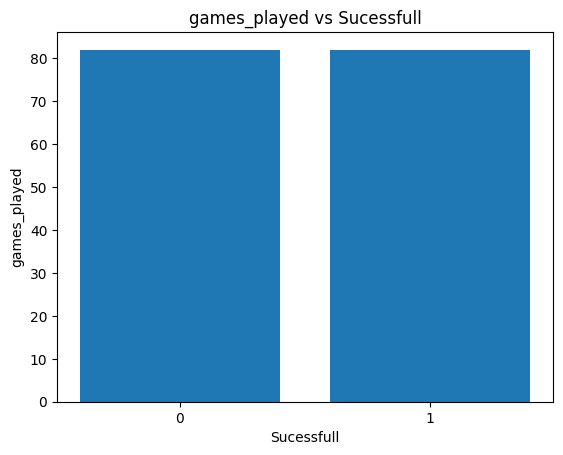

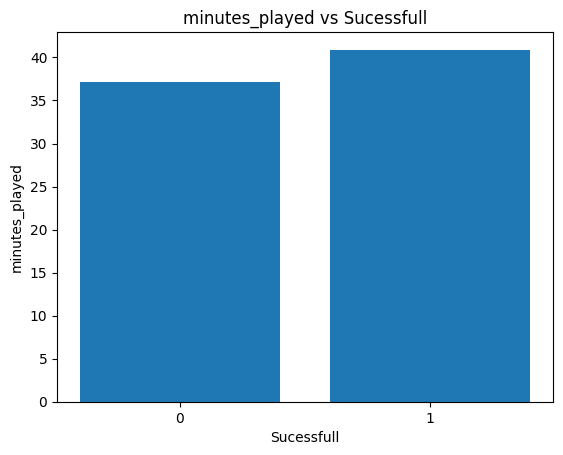

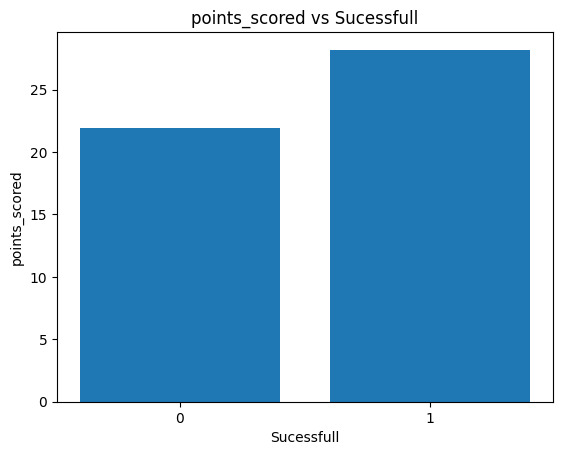

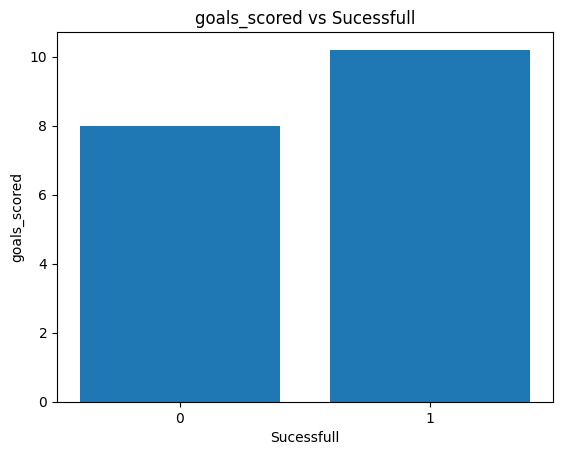

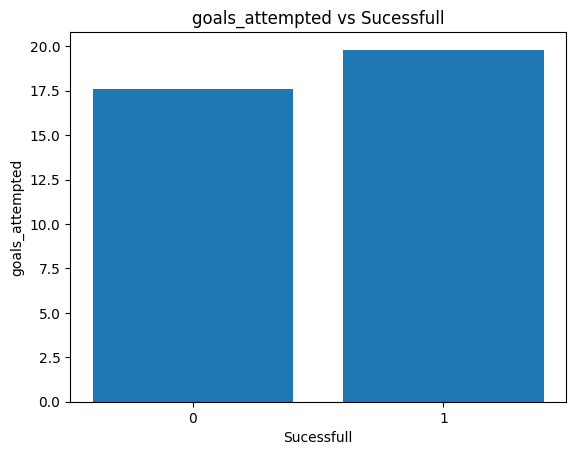

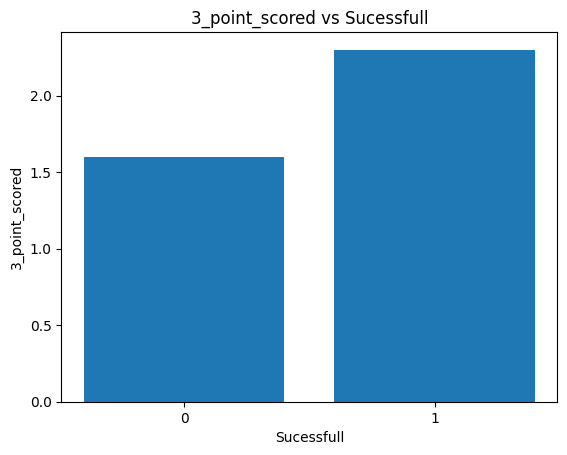

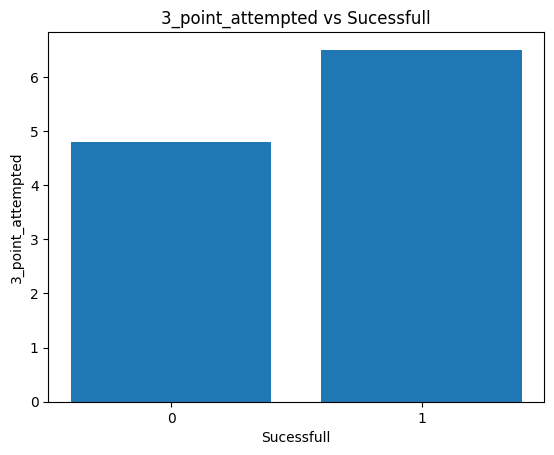

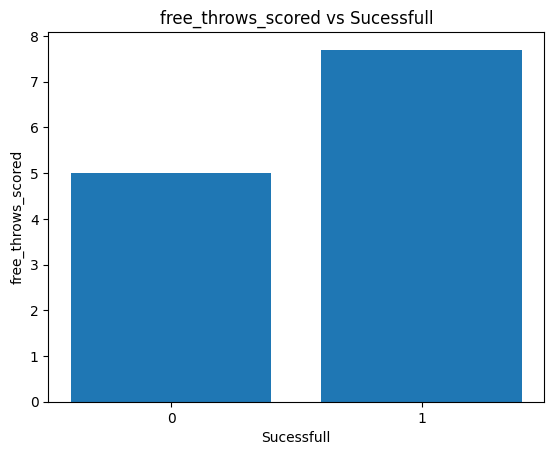

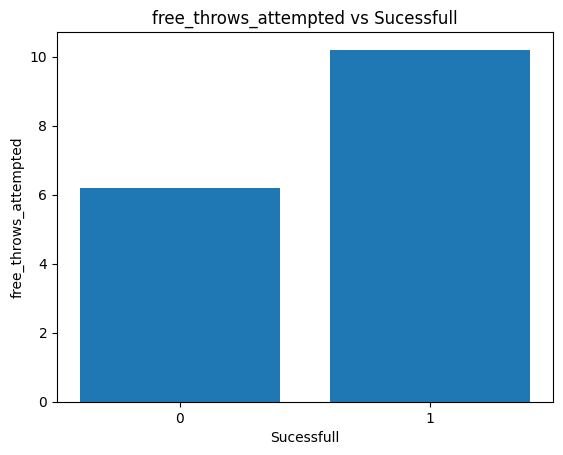

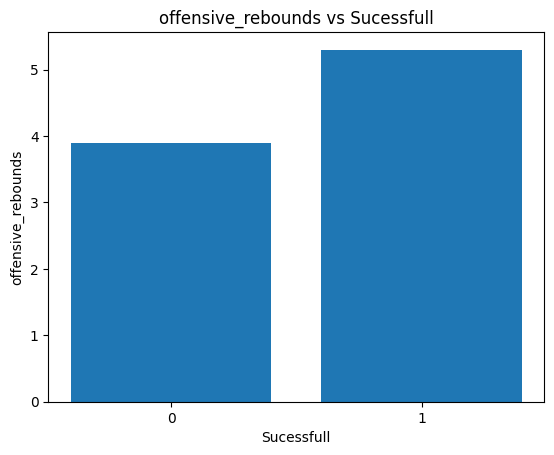

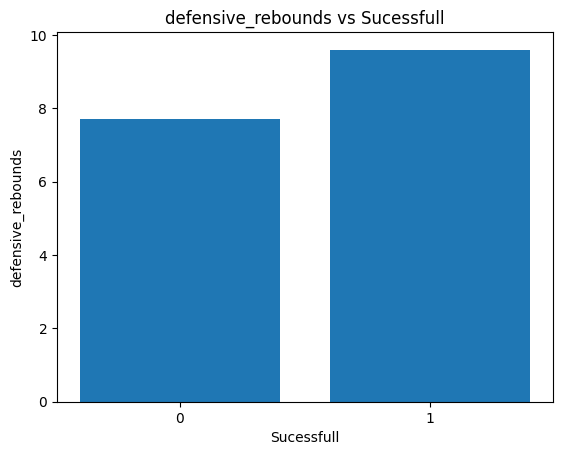

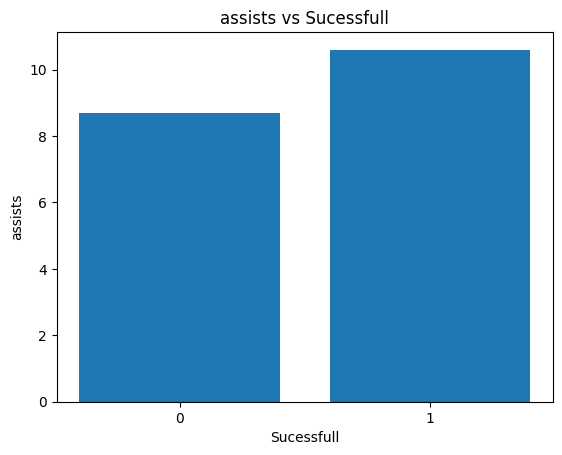

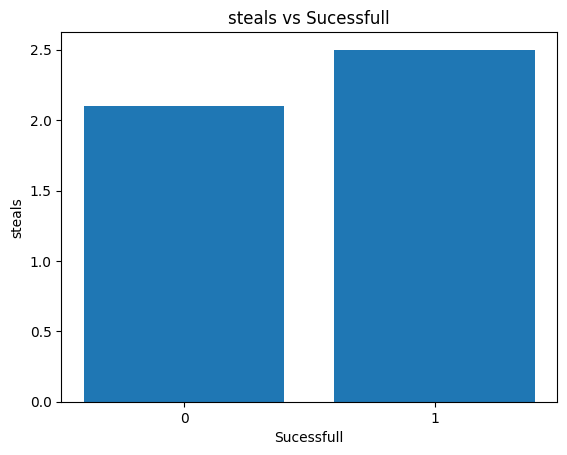

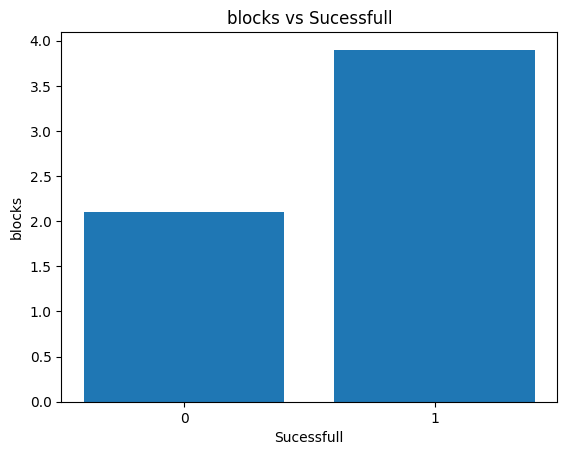

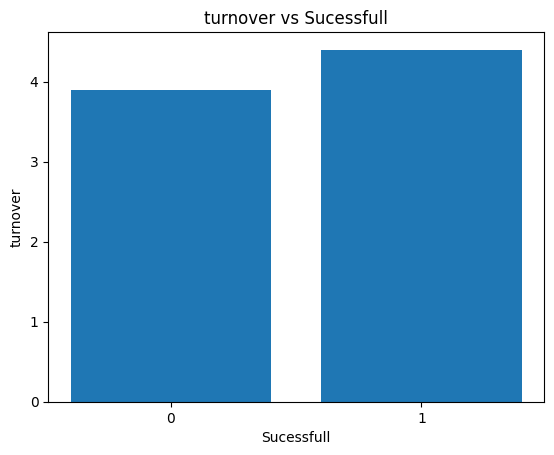

In [89]:
for col in df.columns:
  if col != 'success':
    plt.bar(df['success'], df[col])
    plt.title(col + ' vs Sucessfull')
    plt.xlabel('Sucessfull')
    plt.ylabel(col)
    plt.xticks([0,1])
    plt.show()

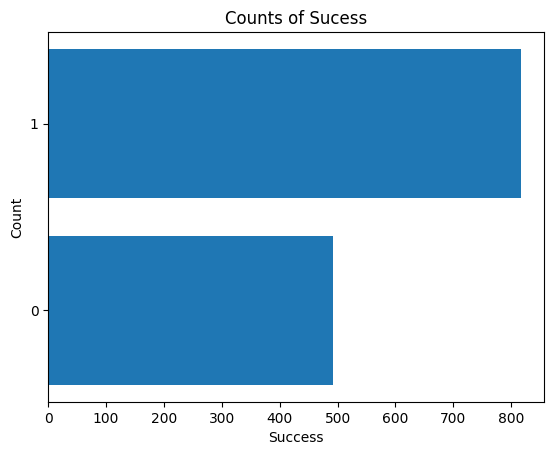

In [90]:
df_success_count = pd.DataFrame(df.success.value_counts())
plt.barh(df_success_count.index, df_success_count.success)
plt.title('Counts of Sucess')
plt.xlabel('Success')
plt.ylabel('Count')
plt.yticks([1,0])
plt.show()

We can see that the dataset is skewed with more targets of Yes rather than no. We will have to apply oversampling methods such as SMOTE to rebalance it.

<ipython-input-91-d874d0496204>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


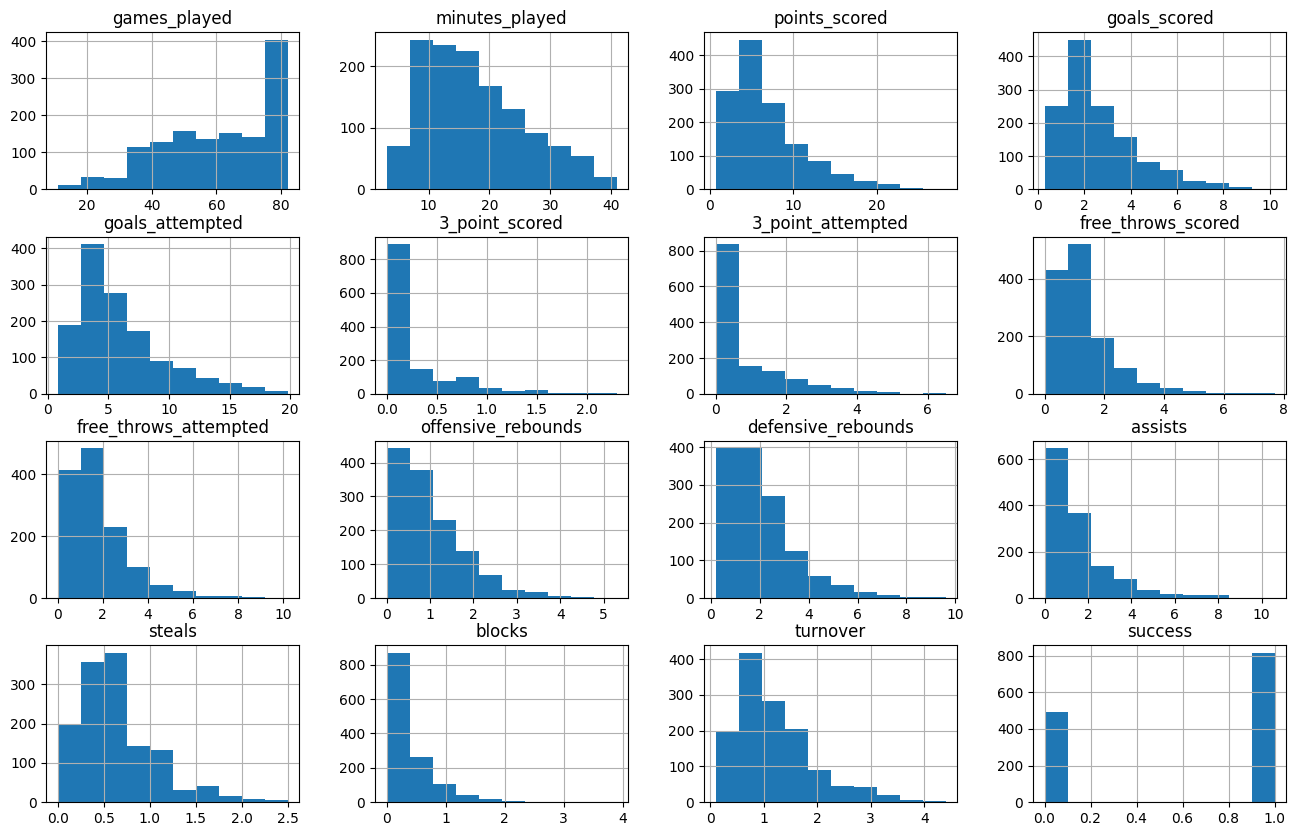

In [91]:
fig = plt.figure(figsize=(16, 10))
ax = plt.gca()
df.hist(ax = ax)
plt.show()

In [92]:
# splitting data
X = df.drop(['success'], axis=1)
y = df['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1046, 15)
(1046,)
(262, 15)
(262,)


In [112]:
# applying smote
# smote = SMOTE(k_neighbors = 5, random_state = 100, sampling_strategy= 'minority')
smote = SMOTENC(sampling_strategy={'minority': target_samples}, categorical_features=[categorical_features])
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(1302, 15)
(1302,)


In [113]:
# applying ADASYN
# adasyn = ADASYN(random_state=100, n_neighbors = 8,sampling_strategy = 1)
# X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_resampled_smote, y_train_resampled_smote)
# print(X_train_resampled.shape)
# print(y_train_resampled.shape)

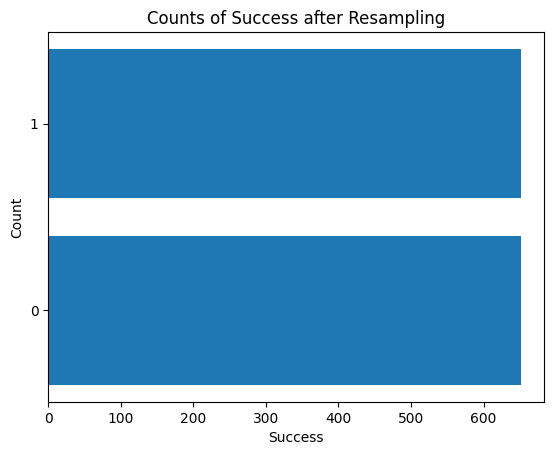

,success
1,651
0,651


In [117]:
df_success_count_resample = pd.DataFrame(y_train_resampled.value_counts())
plt.barh(df_success_count_resample.index, df_success_count_resample.success)
plt.title('Counts of Success after Resampling')
plt.xlabel('Success')
plt.ylabel('Count')
plt.yticks([1,0])
plt.show()
df_success_count_resample

In [118]:
# Normalizing data

In [119]:
# PCA or Something simmilar

In [120]:
# logistic regression